**Equipo "Dinamita", Luis Enrique Gonzalez George 1975503, Carlos Adrián Guillén Benitez 2077519, Gerardo Enrique Doria Villanueva, IA Veranos 2023 N4-N6**

Importamos las librerias Correspondientes

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from skimage.color import rgb2gray
from tensorflow import keras

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargamos y cargamos el archivo de Kaggle

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: brain_tumor_dataset/no/1 no.jpeg  
replace brain_tumor_dataset/no/10 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating

Pre-procesamiento de imagenes, carga y revision de la misma

In [ ]:
folder_path_yes = '/content/brain_tumor_dataset/yes'
folder_path_no = '/content/brain_tumor_dataset/no'

In [ ]:
image_files_yes = glob.glob(folder_path_yes + '/*.jpg')
image_files_no = glob.glob(folder_path_no + '/*.jpg')

In [ ]:
images_yes = []
labels_yes = []
images_no = []
labels_no = []
class_names = ['yes', 'no']

In [ ]:
for image_file in image_files_yes:
    image = Image.open(image_file)
    images_yes.append(image)
    labels_yes.append("yes")

for image_file in image_files_no:
    image = Image.open(image_file)
    images_no.append(image)
    labels_no.append("no")

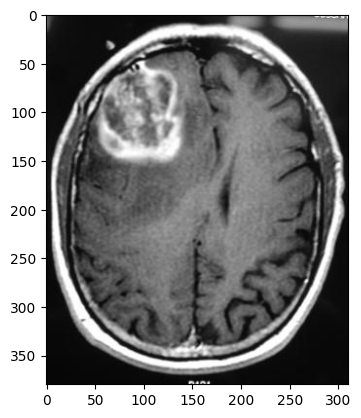

In [ ]:
plt.imshow(images_yes[0])
plt.show()


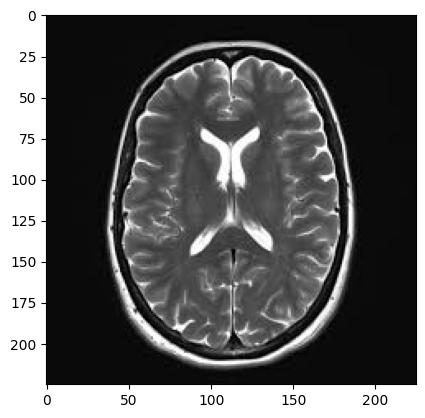

In [ ]:
plt.imshow(images_no[0])
plt.show()

Revisión del contenido general

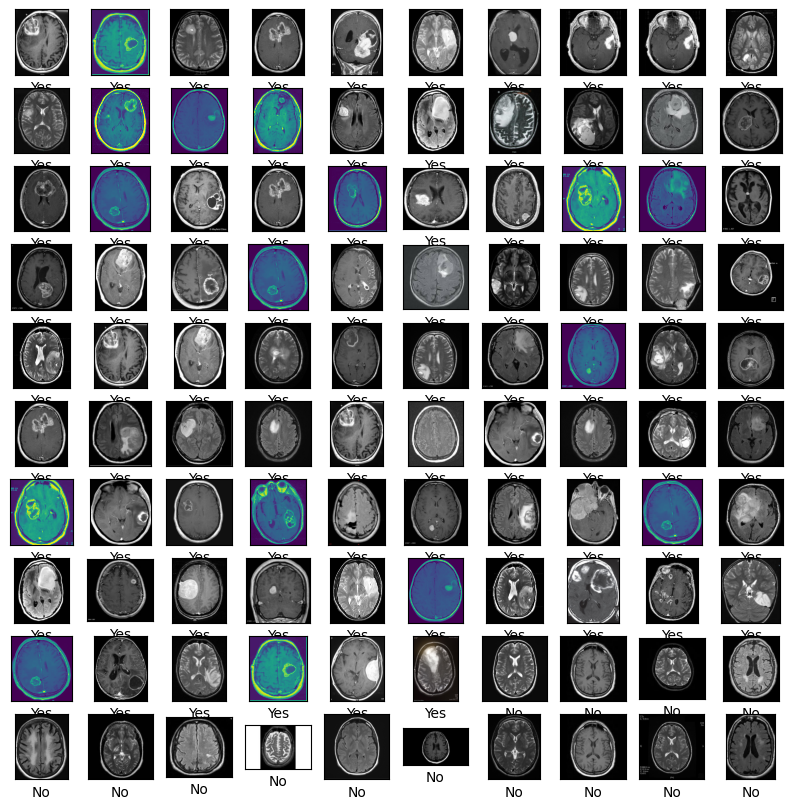

In [ ]:
class_names = ['Yes', 'No']

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Mostrar imagen de la lista images_yes con etiqueta "Yes"
    if i < len(images_yes):
        plt.imshow(images_yes[i])
        plt.xlabel(class_names[0])

    # Mostrar imagen de la lista images_no con etiqueta "No"
    else:
        img_index = i - len(images_yes)
        plt.imshow(images_no[img_index])
        plt.xlabel(class_names[1])

plt.show()

Encontrar la minima resolucion en ambas carpetas, para su posterior reezise y normalización

In [ ]:
min_width_yes = min(image.width for image in images_yes)
min_height_yes = min(image.height for image in images_yes)
print("Tamaño de la imagen más pequeña en la carpeta 'images_yes': {} x {}".format(min_width_yes, min_height_yes))

min_width_no = min(image.width for image in images_no)
min_height_no = min(image.height for image in images_no)
print("Tamaño de la imagen más pequeña en la carpeta 'images_no': {} x {}".format(min_width_no, min_height_no))


Tamaño de la imagen más pequeña en la carpeta 'images_yes': 180 x 210
Tamaño de la imagen más pequeña en la carpeta 'images_no': 150 x 168


**Modelo ML**

Primeramente creamos una lista combinada de imagenes junto con las etiquetas, para posteriormente dividir los datos en conjuntos de entrenamiento y pruebas, despues convertimos las imgenes a formato RGB y redimensionar asi mismo lo convertimos arrays y normalizamos, para Crear la CNN, compilar, evaluar y graficar

Epoch 1/10
4/4 [==============================] - 14s 3s/step - loss: 0.7978 - accuracy: 0.4679 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 0.6167 - accuracy: 0.6514 - val_loss: 0.6142 - val_accuracy: 0.7333
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.5373 - accuracy: 0.7523 - val_loss: 0.5849 - val_accuracy: 0.7000
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 0.5348 - accuracy: 0.7706 - val_loss: 0.8635 - val_accuracy: 0.5667
Epoch 5/10
4/4 [==============================] - 9s 3s/step - loss: 0.5904 - accuracy: 0.6330 - val_loss: 0.6752 - val_accuracy: 0.5667
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.4802 - accuracy: 0.8073 - val_loss: 0.5409 - val_accuracy: 0.7333
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.4106 - accuracy: 0.7890 - val_loss: 0.6164 - val_accuracy: 0.6667
Epoch 8/10
4/4 [========================

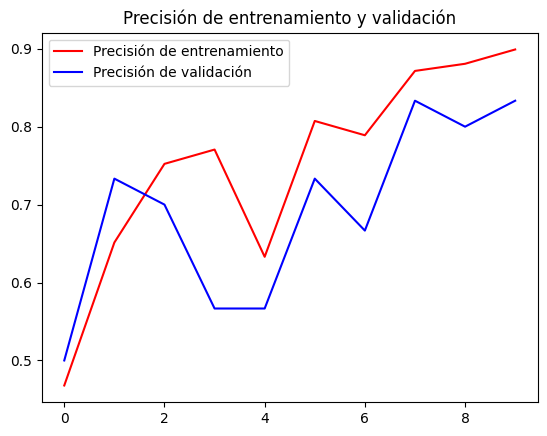

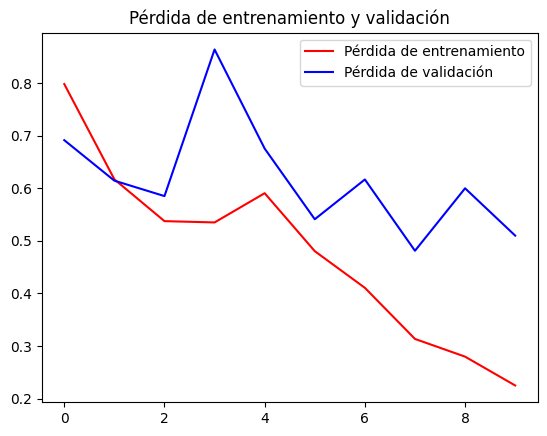

In [ ]:

# Crear una lista combinada de imágenes y etiquetas
images = []
for image in images_yes:
    images.append(np.array(image))
for image in images_no:
    images.append(np.array(image))

labels = np.concatenate((np.ones(len(images_yes)), np.zeros(len(images_no))))

# Dividir los datos en conjuntos de entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convertir las imágenes a formato RGB y redimensionar
new_width = 150
new_height = 150

train_images_rgb = []
train_labels_filtered = []
for image, label in zip(train_images, train_labels):
    resized_image = cv2.resize(image, (new_width, new_height))
    if resized_image.shape == (new_height, new_width, 3):
        train_images_rgb.append(resized_image)
        train_labels_filtered.append(label)

test_images_rgb = []
test_labels_filtered = []
for image, label in zip(test_images, test_labels):
    resized_image = cv2.resize(image, (new_width, new_height))
    if resized_image.shape == (new_height, new_width, 3):
        test_images_rgb.append(resized_image)
        test_labels_filtered.append(label)

# Convertir a formato de arrays y normalizar durante el entrenamiento con ImageDataGenerator
train_images_rgb = np.array(train_images_rgb)
train_labels_filtered = np.array(train_labels_filtered)
test_images_rgb = np.array(test_images_rgb)
test_labels_filtered = np.array(test_labels_filtered)

datagen = ImageDataGenerator(rescale=1.0/255.0)
train_images_normalized = datagen.flow(train_images_rgb, train_labels_filtered)
test_images_normalized = datagen.flow(test_images_rgb, test_labels_filtered)

# Construir el modelo de la CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(new_height, new_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Ajustar el modelo a los datos de entrenamiento
history = model.fit(train_images_normalized, epochs=10, validation_data=test_images_normalized)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(test_images_normalized, verbose=2)
print('Accuracy en los datos de prueba:', test_acc)

# Graficar la precisión y la pérdida durante el entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.legend()
plt.show()



Revisamos la predicción general y observamos su tipo

In [ ]:
predictions=model.predict(test_images_normalized)

1/1 [==============================] - 0s 471ms/step


In [ ]:
predictions[0]

array([0.23878933], dtype=float32)

Hacemos una revisión del modelo

In [ ]:

# Guardar el modelo
model.save('modelo.h5')

# Cargar el modelo
loaded_model = tf.keras.models.load_model('modelo.h5')

# Realizar predicciones con el modelo cargado
predictions = loaded_model.predict(test_images_normalized)

# Convertir las predicciones a etiquetas (0 o 1)
predicted_labels = np.round(predictions).flatten()

# Imprimir las etiquetas predichas y las etiquetas reales
print('Etiquetas predichas:', predicted_labels)
print('Etiquetas reales:', test_labels_filtered)


1/1 [==============================] - 0s 462ms/step
Etiquetas predichas: [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0.]
Etiquetas reales: [0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1.]


Verificamos visualmente el resultado final.

In [ ]:

# Crear una función para mostrar las etiquetas de forma visual y con porcentajes
def show_labels(labels, predicted_labels, images, ncols=5):
    class_names = ['No Tumor', 'Tumor']
    n = len(labels)
    nrows = (n + ncols - 1) // ncols
    figsize = (20, 5 * nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.tight_layout()

    for i, ax in enumerate(axes.flat):
        if i < n:
            label = labels[i]
            predicted_label = predicted_labels[i]
            class_name = class_names[int(label)]
            predicted_class_name = class_names[int(predicted_label)]
            percentage = round(predictions[i][0] * 100, 2)
            is_correct = label == predicted_label

            ax.imshow(images[i])
            ax.set_title(f'True label: {class_name}\nPredicted: {predicted_class_name} ({percentage}%)\nCorrect: {"True" if is_correct else "False"}', color='green' if is_correct else 'red')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.show()

# Mostrar las etiquetas de forma visual y con porcentajes
show_labels(test_labels_filtered, predicted_labels, test_images_rgb)
